In [1]:
import tensorflow as tf
import eurostat
import warnings
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
from tabulate import tabulate
import missingno as msno

warnings.filterwarnings('ignore')

<h1 style="color:black; background-color:white; padding:5px; padding-bottom:10px;text-align: center">Methodology for handling missing values</h1>

<h2 style="color:black; background-color:yellow; padding:5px; padding-bottom:10px; margin-bottom:-10px">I. Introduction</h2>
<p style="color:black; background-color:yellow; padding:5px;">
Data analysis is a fundamental tool for understanding the world around us. The study of dynamics, diversity, similarity, causality, gives us the opportunity to introduce seemingly chaotic processes into logical frameworks using models. But one of the main first steps for any researcher is to "understand" the data to be analyzed. It is precisely the missing parts of the data that appear to be one of the challenges underlying the objectivity of the subsequent tools and models that will be used. This paper attempts to present a methodology for in-depth analysis of missing data. In a logical sequence, the various tools for in-depth analysis of missing data will be revealed step by step.</p>

<h2 style="color:black; background-color:yellow; padding:5px; padding-bottom:10px; margin-bottom:-10px">II. Theoretical foundations of missing data.</h2>
<p style="color:black; background-color:yellow; padding:5px;">
    </p>


<h2 style="color:black; background-color:yellow; padding:5px; margin-bottom:-15px">Content</h2>
<ul style="color:black; background-color:yellow; padding:5px; margin-bottom:-10px">In this step, we familiarize ourselves with the data, its parameters and elements. Basic manipulations will be performed to help us use and better understand the elements to continue the research in the next steps. It includes the following manipulations: </ul>
<li style="color:black; background-color:yellow; padding:5px">loading the databasess</li>
<li style="color:black; background-color:yellow; padding:5px">extraction of uniqueness by features and observations</li>
<li style="color:black; background-color:yellow; padding:5px">extraction basic information about the datas</li>
<li style="color:black; background-color:yellow; padding:5px">dataframe trasnformation: features and rows manipulation and transformation</li>

<h2 style="color:black; background-color:yellow; padding:5px; padding-bottom:10px;">III. Methodology and empirical analysis </h2>

<h3 style="color:black; background-color:yellow; padding:5px; padding-bottom:10px; margin-bottom:-10px">1. Import the database</h3>
<p style="color:black; background-color:yellow; padding:5px;">
In the first step, two main things are done: on the one hand, the database is imported, on the other hand, its main elements are extracted, which will allow us to acquire basic information about the database that will be the subject of an example study.</p>

In [3]:
def import_data (**kwargs):
    global key
    for key, value in kwargs.items():
        df_name = key
        globals()[df_name] = eurostat.get_data_df(value)
        return globals()[df_name]

In [4]:
import_data(df_minimum_wage = "earn_mw_cur")

,currency,geo\time,2022S2,2022S1,2021S2,2021S1,2020S2,2020S1,2019S2,2019S1,...,2003S2,2003S1,2002S2,2002S1,2001S2,2001S1,2000S2,2000S1,1999S2,1999S1
0,EUR,AL,268.61,248.43,244.56,242.52,209.10,213.45,211.99,210.66,...,74.40,67.06,67.75,62.78,60.13,52.80,52.36,46.98,45.12,NaN
1,EUR,AT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EUR,BE,1842.28,1658.23,1625.72,1625.72,1625.72,1593.81,1593.81,1593.81,...,1186.31,1163.02,1163.02,1140.24,1140.24,1117.88,1095.89,1095.89,1095.89,1074.44
3,EUR,BG,363.02,332.34,332.34,332.34,311.89,311.89,286.33,286.33,...,56.52,56.28,51.24,51.38,43.65,40.42,38.35,34.26,34.26,31.19
4,EUR,CH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,PPS,SI,1217.79,1217.79,1160.91,1160.91,1072.77,1072.77,1019.61,1019.61,...,566.74,566.74,534.56,534.56,498.73,498.73,484.59,467.30,449.31,449.31
107,PPS,SK,719.80,719.80,694.18,694.18,645.24,645.24,599.52,599.52,...,261.31,261.31,248.05,248.05,225.39,225.39,202.59,202.59,191.81,159.84
108,PPS,TR,NaN,NaN,NaN,NaN,824.57,824.57,846.59,846.59,...,307.40,307.40,321.06,284.10,303.65,253.10,306.51,283.29,360.90,301.06
109,PPS,UK,NaN,NaN,NaN,NaN,1348.67,1269.79,1284.84,1228.01,...,770.21,770.21,743.46,743.46,681.56,681.56,645.38,645.38,624.35,NaN


In [6]:
def uniques (df):
    print(f"Names of columns (features): \n{df.columns}")
    for col in df:
        if not df[col].dtype == "float" or df[col].dtype == "int":
            print(f"\nElements of columns (observations): \"{col}\": \n {df[col].unique()}")
            print(f"Number of elements of columns (observations): \"{col}\": \n {df[col].unique().size}")

        else:
            pass
    print(f"\nThe unique observation of a feature in which periods are mentioned is not logically applicable at this stage of the analysis")

In [7]:
uniques(df_minimum_wage)

Names of columns (features): 
Index(['currency', 'geo\time', '2022S2', '2022S1', '2021S2', '2021S1',
       '2020S2', '2020S1', '2019S2', '2019S1', '2018S2', '2018S1', '2017S2',
       '2017S1', '2016S2', '2016S1', '2015S2', '2015S1', '2014S2', '2014S1',
       '2013S2', '2013S1', '2012S2', '2012S1', '2011S2', '2011S1', '2010S2',
       '2010S1', '2009S2', '2009S1', '2008S2', '2008S1', '2007S2', '2007S1',
       '2006S2', '2006S1', '2005S2', '2005S1', '2004S2', '2004S1', '2003S2',
       '2003S1', '2002S2', '2002S1', '2001S2', '2001S1', '2000S2', '2000S1',
       '1999S2', '1999S1'],
      dtype='object')

Elements of columns (observations): "currency": 
 ['EUR' 'NAC' 'PPS']
Number of elements of columns (observations): "currency": 
 3

Elements of columns (observations): "geo\time": 
 ['AL' 'AT' 'BE' 'BG' 'CH' 'CY' 'CZ' 'DE' 'DK' 'EE' 'EL' 'ES' 'FI' 'FR'
 'HR' 'HU' 'IE' 'IS' 'IT' 'LT' 'LU' 'LV' 'ME' 'MK' 'MT' 'NL' 'NO' 'PL'
 'PT' 'RO' 'RS' 'SE' 'SI' 'SK' 'TR' 'UK' 'US']
Number of elem

In [8]:
def db_info (df):
    observations = None
    features = None
    observations, features = df.shape
    print("1. Оbservations and features: \n {} Оbservations and {} features".format(observations, features))
    print("-------------------------------")
    print (f"2. Number of cases in the table: {df.size}")
    print("--------------------------------")
    print(f"3. The sum of element types by type is as follows: \n {df.dtypes.value_counts(ascending=True)}")
    print("--------------------------------")

    list_objects = []
    list_float64 = []

    for col in df.columns:
        if df[col].dtypes == "object":
            list_objects += [col]
        elif df[col].dtypes == "float64":
            list_float64 += [col]
    print("4. Group the features by data type:")
    print(f" object = {list_objects} \n")
    print(f" float64 = {list_float64}")
    print("--------------------------------------------------------------------------------")

    return df.applymap(type).apply(pd.value_counts).fillna(0)

In [9]:
db_info(df_minimum_wage)

1. Оbservations and features: 
 111 Оbservations and 50 features
-------------------------------
2. Number of cases in the table: 5550
--------------------------------
3. The sum of element types by type is as follows: 
 object      2
float64    48
dtype: int64
--------------------------------
4. Group the features by data type:
 object = ['currency', 'geo\\time'] 

 float64 = ['2022S2', '2022S1', '2021S2', '2021S1', '2020S2', '2020S1', '2019S2', '2019S1', '2018S2', '2018S1', '2017S2', '2017S1', '2016S2', '2016S1', '2015S2', '2015S1', '2014S2', '2014S1', '2013S2', '2013S1', '2012S2', '2012S1', '2011S2', '2011S1', '2010S2', '2010S1', '2009S2', '2009S1', '2008S2', '2008S1', '2007S2', '2007S1', '2006S2', '2006S1', '2005S2', '2005S1', '2004S2', '2004S1', '2003S2', '2003S1', '2002S2', '2002S1', '2001S2', '2001S1', '2000S2', '2000S1', '1999S2', '1999S1']
--------------------------------------------------------------------------------


,currency,geo\time,2022S2,2022S1,2021S2,2021S1,2020S2,2020S1,2019S2,2019S1,...,2003S2,2003S1,2002S2,2002S1,2001S2,2001S1,2000S2,2000S1,1999S2,1999S1
<class 'str'>,111.0,111.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
<class 'float'>,0.0,0.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,...,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0


In [25]:
df_minimum_wage = df_minimum_wage[list(df_minimum_wage.columns[:2]) + list(df_minimum_wage.columns[:1:-1])]
df_minimum_wage

,currency,geo\time,1999S1,1999S2,2000S1,2000S2,2001S1,2001S2,2002S1,2002S2,...,2018S1,2018S2,2019S1,2019S2,2020S1,2020S2,2021S1,2021S2,2022S1,2022S2
0,EUR,AL,NaN,45.12,46.98,52.36,52.80,60.13,62.78,67.75,...,180.52,190.58,210.66,211.99,213.45,209.10,242.52,244.56,248.43,268.61
1,EUR,AT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EUR,BE,1074.44,1095.89,1095.89,1095.89,1117.88,1140.24,1140.24,1163.02,...,1562.59,1562.59,1593.81,1593.81,1593.81,1625.72,1625.72,1625.72,1658.23,1842.28
3,EUR,BG,31.19,34.26,34.26,38.35,40.42,43.65,51.38,51.24,...,260.76,260.76,286.33,286.33,311.89,311.89,332.34,332.34,332.34,363.02
4,EUR,CH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,PPS,SI,449.31,449.31,467.30,484.59,498.73,498.73,534.56,534.56,...,967.87,967.87,1019.61,1019.61,1072.77,1072.77,1160.91,1160.91,1217.79,1217.79
107,PPS,SK,159.84,191.81,202.59,202.59,225.39,225.39,248.05,248.05,...,567.77,567.77,599.52,599.52,645.24,645.24,694.18,694.18,719.80,719.80
108,PPS,TR,301.06,360.90,283.29,306.51,253.10,303.65,284.10,321.06,...,775.51,775.51,846.59,846.59,824.57,824.57,NaN,NaN,NaN,NaN
109,PPS,UK,NaN,624.35,645.38,645.38,681.56,681.56,743.46,743.46,...,1176.43,1231.36,1228.01,1284.84,1269.79,1348.67,NaN,NaN,NaN,NaN


---

<h3 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">2. Missing values by columns</h3>
<p style="color:black; background-color:white; padding:5px;">
In this step, we run a check for missing values on all columns. As a result, the missing values will be presented as an absolute number and as a relative number. The relative is calculated based on the percentage of missing values of the column from all elements of the column itself.</p>

In [26]:
def missing_values_features(df):
    df_missing = df.isna().sum()
    b = df_missing / len(df)
    df_missing_relative = b.map(lambda n: '{:,.2%}'.format(n))
    print("Missing values")
    missing_all = pd.concat([df_missing, df_missing_relative], axis=1, keys=('Absolute number','Relative number'))

    missing_all.index = missing_all.index.map(str)
    
    fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10,12))
    axes[0].barh(missing_all.index, missing_all["Absolute number"])
    axes[0].set(title='Absolute number')
    axes[0].invert_xaxis()

    axes[0].yaxis.tick_right()

    axes[1].barh(missing_all.index, (b*100), color = "c")
    axes[1].set(title='Relative number')


    axes[0].bar_label(axes[0].barh(missing_all.index, missing_all["Absolute number"]), label_type='center')
    axes[1].bar_label((axes[1].barh(missing_all.index, (b*100))), fmt='%.2f')

    fig.tight_layout()
    fig.subplots_adjust(wspace=0.18)
    plt.show()

Missing values


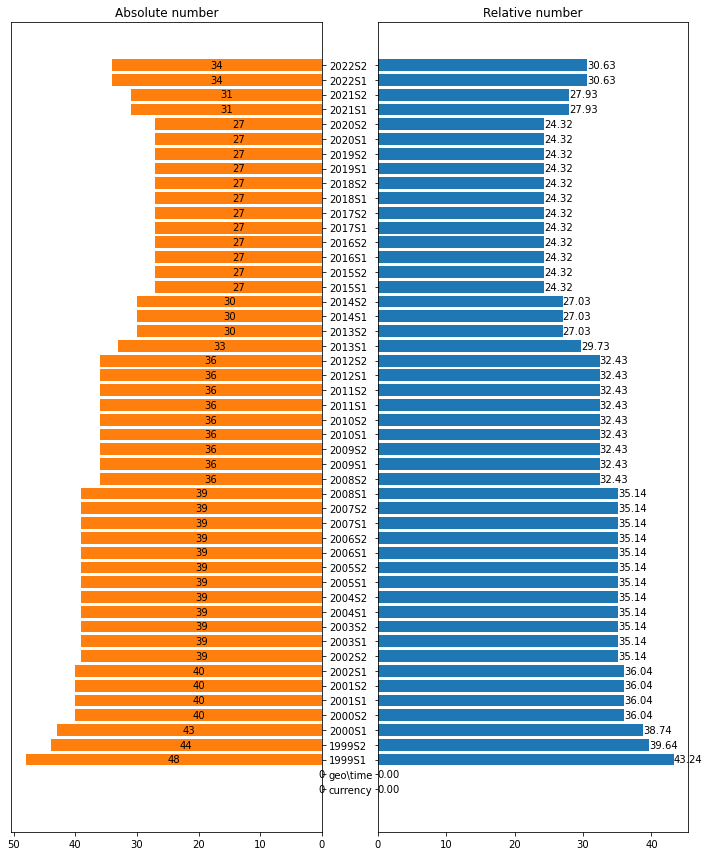

In [27]:
missing_values_features(df_minimum_wage)

<AxesSubplot:>

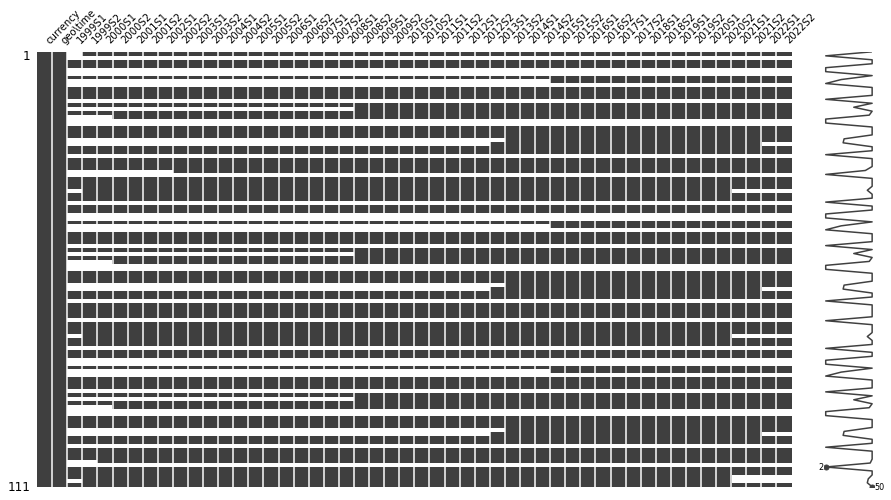

In [28]:
msno.matrix(df_minimum_wage, figsize=(15, 8), fontsize=10)